In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Performance Prediction.csv")
data

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

In [4]:
def preprocessing_inputs(df):
    df = df.copy()
    
    # Drop name column
    df = df.drop("Name", axis = 1)
    
    # Fill missing values
    df['3PointPercent'] = df['3PointPercent'].fillna(df['3PointPercent'].mean())
    
    # Split data into X, y
    X = df.drop('Target', axis = 1)
    y = df["Target"]
    
    # Train and test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True, random_state = 1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocessing_inputs(data)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)

print("Test Accuracy: {:.2f}%".format(acc*100))

Test Accuracy: 71.22%


In [7]:
pca = PCA(n_components = 2)
X_reduced = pd.DataFrame(pca.fit_transform(X_train), index = X_train.index, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_train)

clusters = pd.Series(kmeans.labels_, name = "Cluster", index = X_train.index)
centroids = pca.transform(kmeans.cluster_centers_)

X_reduced = pd.concat([X_reduced, y_train, clusters], axis = 1)
X_reduced

,PCA1,PCA2,Target,Cluster
363,1.858379,2.680904,1,0
10,-3.918799,-0.832184,0,2
971,-0.372334,-1.690180,1,1
634,-2.197657,-1.326911,0,2
554,0.556465,-1.539912,0,1
...,...,...,...,...
715,-0.603175,-2.408503,1,1
905,0.109021,-0.130642,1,1
1096,2.142061,-1.688440,0,1
235,-3.806854,0.707097,1,2


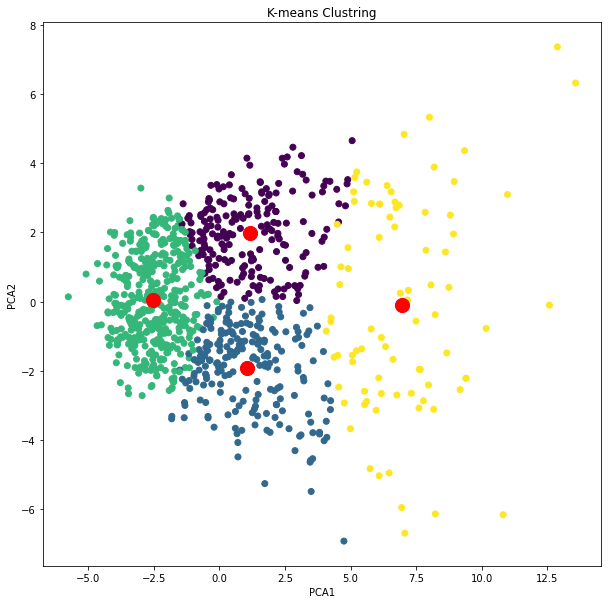

In [8]:
plt.figure(figsize = (10, 10))
plt.scatter(X_reduced['PCA1'], X_reduced['PCA2'], c = X_reduced['Cluster'])
plt.scatter(centroids[:,0], centroids[:,1], color = 'r', s = 200)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-means Clustring")
plt.show()